# 2D OU Model, Scale Seperation Experiment

In this notebook we implement the MAM algorithm for the 2D OU system with a large scale seperation.

We have plotted the correspondence with the analytic solution.

In [1]:
# Instanton Code Imports
import sys
sys.path.append('/rds/general/user/cfn18/home/Instantons/L96-EBM-Instanton')
    
from mam import Mam_alg
from instanton_utility import *
    
# Standard Package imports
import numpy as np
import numpy.linalg as la
import numpy.random as rm
from scipy.linalg import expm

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


## Loading Run

In [2]:
result, s, bc, time = load_result('Gamma-Run')

Loading Gamma-Run


In [3]:
# Unpacking Load

initial_point = bc[0]
final_point = bc[1]
t0 = time[0]
tF = time[-1]
mam_instanton = result.x.reshape((100, 2))
gamma1, gamma2, eps, r = s

print('For loaded data we have:')
print(f'    gamma_1 = {gamma1}')
print(f'    gamma_2 = {gamma2}')
print(f'    eps = {eps}')
print(f'    r = {r}')

For loaded data we have:
    gamma_1 = 10
    gamma_2 = 0.1
    eps = 0.01
    r = 0.01


## Analytic Solution

In [4]:
# Analytic Solution Defintion

def expA(t, p):
    gamma1, gamma2, eps, r = p
    row1 = np.array([-gamma1, -gamma1, 1, 0])
    row2 = np.array([gamma2, -gamma2, 0, r**2])
    row3 = np.array([0, 0, gamma1, -gamma2])
    row4 = np.array([0, 0, gamma1, gamma2])
    A = np.vstack((row1, row2, row3, row4))
    return expm(A * t) 

In [5]:
# Solving Linear System arising from Boundary Conditions
# a * c = b

a = np.vstack((expA(t0, s)[:2], expA(tF, s)[:2]))
b = np.hstack([initial_point, final_point]) # BCs
c = la.solve(a, b)
print(f'c = {c}')

c = [   0.            0.           27.45765452 2690.48029046]


In [6]:
analytic_solution = np.vstack([np.matmul(expA(t, p=s), c) for t in time])

## Comparison Between MAM Output and Analytic Solution

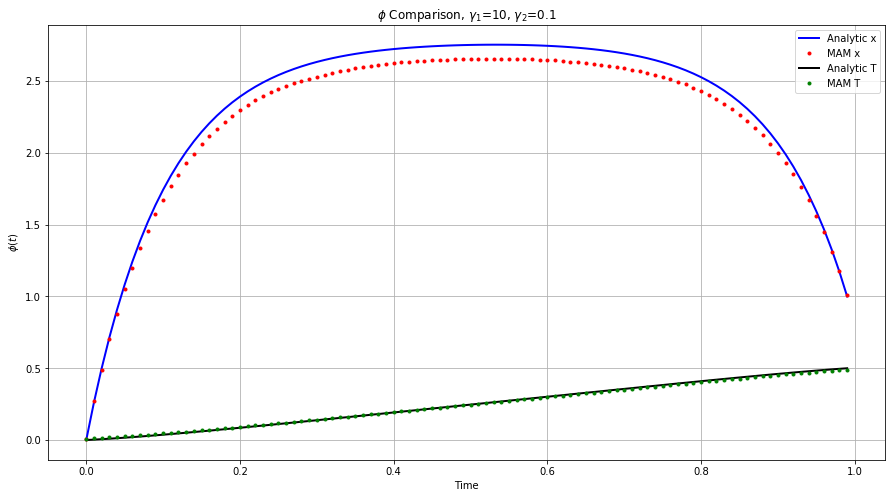

In [7]:
# Comparison Plot

fig, ax = plt.subplots(figsize=(15, 8))

ax.grid()
ax.set_title(f'$\\phi$ Comparison, $\\gamma _1$={gamma1}, $\\gamma _2$={gamma2}')
ax.plot(time,  analytic_solution[:, 0],'b', linewidth=2, label = 'Analytic x')
ax.plot(time, mam_instanton[:, 0], 'r.', label = 'MAM x')

ax.plot(time,  analytic_solution[:, 1],'k', linewidth=2, label = 'Analytic T')
ax.plot(time, mam_instanton[:, 1], 'g.', label = 'MAM T')

ax.set_xlabel('Time')
ax.set_ylabel('$\\phi(t)$')
ax.legend()
fig.show()